## Observations and Insights 

In [161]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata,study_results,how='outer',on='Mouse ID')

# Display the data table for preview
mouse_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [162]:
# Checking the number of mice.
len(mouse_df['Mouse ID'])

1893

In [163]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_mouse_df = mouse_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
len(clean_mouse_df['Mouse ID'])

1888

In [164]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_df['Duplicated'] = mouse_df.duplicated(subset=['Mouse ID', 'Timepoint'])

#Create a new dataframe to store all the duplicated data based on Mouse ID and Timepoint
duplicated_mouse_df = mouse_df[mouse_df['Duplicated'] == True]

#Drop column that is unused
duplicated_mouse_df = duplicated_mouse_df.drop(['Duplicated'], axis = 1)
#Check the number
len(duplicated_mouse_df['Mouse ID'])
#Show the duplicated mosue ID
duplicated_mouse_df.head()

#Drop column that is unused
mouse_df = mouse_df.drop(['Duplicated'], axis = 1)

In [165]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Keeping last for the quartlies exercices
mousedrug_df = clean_mouse_df.drop_duplicates(subset=['Mouse ID'],keep='last')

In [166]:
# Checking the number of mice in the clean DataFrame.
mousedrug_df['Mouse ID'].nunique()

249

## Summary Statistics

In [167]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
def Summary_Stats(drug_name):

    #Create a key 
    drug_name = {
        'drug_name': drug_name,
        'median': mousedrug_df.loc[mousedrug_df['Drug Regimen'] == str(drug_name),'Tumor Volume (mm3)'].median(),
        'mean': mousedrug_df.loc[mousedrug_df['Drug Regimen'] == str(drug_name),'Tumor Volume (mm3)'].mean(),
        'mode': mousedrug_df.loc[mousedrug_df['Drug Regimen'] == str(drug_name),'Tumor Volume (mm3)'].mode()[0],
        'var': mousedrug_df.loc[mousedrug_df['Drug Regimen'] == str(drug_name),'Tumor Volume (mm3)'].var(),
        'sd': mousedrug_df.loc[mousedrug_df['Drug Regimen'] == str(drug_name),'Tumor Volume (mm3)'].std(),
        'sem': st.sem(mousedrug_df.loc[mousedrug_df['Drug Regimen'] == str(drug_name),'Tumor Volume (mm3)'])
    }
    return drug_name

# This method is the most straighforward, creating multiple series and putting them all together at the end.

#Get a list of Unique drugs 
drug_regimen = mousedrug_df['Drug Regimen'].unique()

sum_stats = []
i = 0

for drug_name in drug_regimen:
    sum_stats.append(Summary_Stats(drug_name))
    i += 1

sum_stats_df = pd.DataFrame(sum_stats)
sum_stats_df



,drug_name,median,mean,mode,var,sd,sem
0,Ramicane,36.561652,36.191390,22.050126,32.166354,5.671539,1.134308
1,Capomulin,38.125164,36.667568,23.343598,32.663378,5.715188,1.143038
2,Infubinol,60.165180,58.178246,36.321346,74.010875,8.602957,1.720591
3,Placebo,62.030594,60.508414,45.000000,78.759797,8.874672,1.774934
4,Ceftamin,59.851956,57.753977,45.000000,69.982735,8.365568,1.673114
5,Stelasyn,62.192350,61.001707,45.000000,90.331586,9.504293,1.940056
6,Zoniferol,61.840058,59.181258,45.000000,76.862027,8.767099,1.753420
7,Ketapril,64.487812,62.806191,45.000000,98.921330,9.945920,1.989184
8,Propriva,55.841410,56.736964,45.000000,69.349002,8.327605,1.665521
9,Naftisol,63.283288,61.205757,45.000000,106.029927,10.297083,2.059417


Median or mean is probably the best use case for this data as the mode is not useful at all 

In [168]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
grouped_regimen = mousedrug_df.groupby('Drug Regimen')
sumstats = grouped_regimen[['Tumor Volume (mm3)']].describe()
sumstats


Tumor Volume (mm3)                                              \
                          count       mean        std        min        25%   
Drug Regimen                                                                  
Capomulin                  25.0  36.667568   5.715188  23.343598  32.377357   
Ceftamin                   25.0  57.753977   8.365568  45.000000  48.722078   
Infubinol                  25.0  58.178246   8.602957  36.321346  54.048608   
Ketapril                   25.0  62.806191   9.945920  45.000000  56.720095   
Naftisol                   25.0  61.205757  10.297083  45.000000  52.079510   
Placebo                    25.0  60.508414   8.874672  45.000000  52.942902   
Propriva                   25.0  56.736964   8.327605  45.000000  49.122969   
Ramicane                   25.0  36.191390   5.671539  22.050126  31.560470   
Stelasyn                   24.0  61.001707   9.504293  45.000000  52.476596   
Zoniferol                  25.0  59.181258   8.767099  45.000000  49.988302   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     38.125164  40.159220  47.685963  
Ceftamin      59.851956  64.299830  68.923185  
Infubinol     60.165180  65.525743  72.226731  
Ketapril      64.487812  69.872251  78.567014  
Naftisol      63.283288  69.563621  76.668817  
Placebo       62.030594  68.134288  73.212939  
Propriva      55.841410  62.570880  72.455421  
Ramicane      36.561652  40.659006  45.220869  
Stelasyn      62.192350  69.103944  75.123690  
Zoniferol     61.840058  66.794156  73.324432

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mouse')

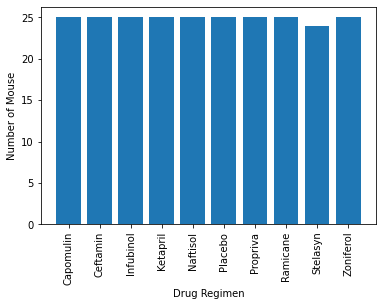

In [169]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
plt.bar(sumstats.index,sumstats[(('Tumor Volume (mm3)', 'count'))])

s_ = pd.Series(sumstats.index,sumstats[(('Tumor Volume (mm3)', 'count'))])
s_.plot

plt.xlabel('Drug Regimen')
plt.xticks(rotation = 90)
plt.ylabel('Number of Mouse')

Text(0, 0.5, 'Number of Mouse')

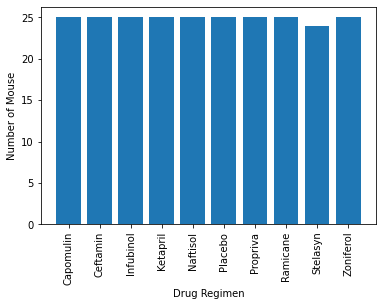

In [170]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(sumstats.index,sumstats[(('Tumor Volume (mm3)', 'count'))])
plt.xlabel('Drug Regimen')
plt.xticks(rotation = 90)
plt.ylabel('Number of Mouse')

<AxesSubplot:title={'center':'Distribution of Sex of Mouse in the Study'}, ylabel='Sex'>

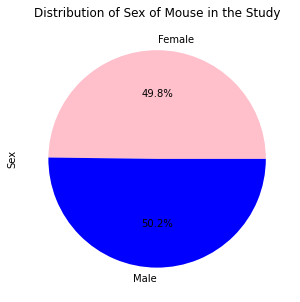

In [171]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = mousedrug_df.groupby(['Sex'])
gender = gender_group['Sex']
colors = ['Pink','Blue']
size = gender_group['Sex'].count()

#Plot using Pandas
size.plot.pie(y = 'Sex', figsize=(5,5), autopct="%1.1f%%", colors = colors, title = 'Distribution of Sex of Mouse in the Study')


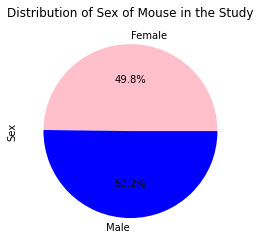

In [172]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(size, labels = size.index, colors=colors,autopct="%1.1f%%")
plt.title('Distribution of Sex of Mouse in the Study')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [173]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_set = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

drugset_df = mousedrug_df
#drugset_df.reset_index() 
drugset_df = drugset_df[drugset_df['Drug Regimen'].isin(drug_set)]

#Three seperate Boxplots
#drugset_df.groupby('Drug Regimen').boxplot(column='Tumor Volume (mm3)');


# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# > Completed during creating mousedrug_df

In [174]:
# Put treatments into a list for for loop (and later for plot labels)
# > refer to 'drug_set'
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

def IQR(drug_name):
    
    df =  drugset_df.loc[drugset_df['Drug Regimen'] == str(drug_name),'Tumor Volume (mm3)']
    quartiles = df.quantile([.25,.5,.75])
    
    drug_name = {
        'name' : drug_name,
        'quartiles': quartiles,
        'lowerq': quartiles[0.25],
        'upperq': quartiles[0.75],
        'iqr': quartiles[0.75]-quartiles[0.25],
        'lower_bound': quartiles[0.25] - (1.5*(quartiles[0.75]-quartiles[0.25])),
        'upper_bound': quartiles[0.75] + (1.5*(quartiles[0.75]-quartiles[0.25]))
    }
    drug_name['outlier'] =  (df.loc[(df < drug_name['lower_bound']) | (df > drug_name['upper_bound'])])

    if drug_name['outlier'].index.empty == True:
        drug_name['outlier'] = 'No Outlier'
    else:
        drug_name['outlier'] = drug_name['outlier'].iloc[0]
    
    print('Regimen: '+ str(drug_name['name']))
    print('Lower Quartile: ' + str(drug_name['lowerq']) + ', Upper Quartile: ' + str(drug_name['upperq']) + ', Interquartile Range: ' + str(drug_name['iqr']))
    print('Lower bound: ' + str(drug_name['lower_bound']) + ', Upper Bound: ' +  str(drug_name['upper_bound']))
    print('Outlier: ' + str(drug_name['outlier']))

    return drug_name

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for drug in drug_set:
    tumor_vol.append(IQR(drug)) 
    


Regimen: Capomulin
Lower Quartile: 32.37735684, Upper Quartile: 40.1592203, Interquartile Range: 7.781863460000004
Lower bound: 20.70456164999999, Upper Bound: 51.83201549
Outlier: No Outlier
Regimen: Ramicane
Lower Quartile: 31.56046955, Upper Quartile: 40.65900627, Interquartile Range: 9.098536719999998
Lower bound: 17.912664470000003, Upper Bound: 54.30681135
Outlier: No Outlier
Regimen: Infubinol
Lower Quartile: 54.04860769, Upper Quartile: 65.52574285, Interquartile Range: 11.477135160000003
Lower bound: 36.83290494999999, Upper Bound: 82.74144559000001
Outlier: 36.3213458
Regimen: Ceftamin
Lower Quartile: 48.72207785, Upper Quartile: 64.29983003, Interquartile Range: 15.577752179999997
Lower bound: 25.355449580000002, Upper Bound: 87.66645829999999
Outlier: No Outlier


<AxesSubplot:title={'center':'Tumor Volume (mm3)'}, xlabel='Drug Regimen'>

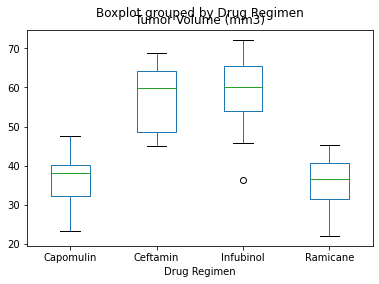

In [175]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drugset_df.boxplot(by='Drug Regimen', column=['Tumor Volume (mm3)'], grid = False)

The drug Regimen is quite centrally distributed, out of all 4 of the regimen only 1 have an outlier.

## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

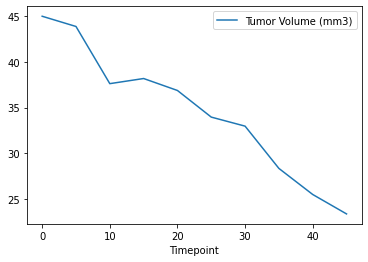

In [176]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = clean_mouse_df.loc[clean_mouse_df['Drug Regimen']=='Capomulin']

#Use S185 for a mouse treated with Capomulin
mouse_ = capomulin_df.loc[capomulin_df['Mouse ID']=='s185']
mouse_.plot.line(x='Timepoint',y='Tumor Volume (mm3)')

Text(0, 0.5, 'Weight (g)')

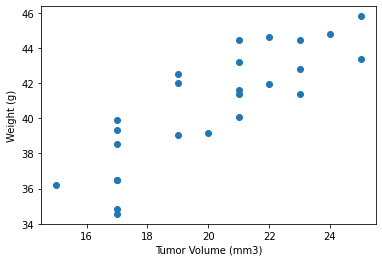

In [177]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse1 = capomulin_df.groupby('Mouse ID')

ave_tumor = mouse1['Tumor Volume (mm3)'].mean()
ave_weight = mouse1['Weight (g)'].mean()
plt.scatter(ave_weight,ave_tumor)
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')

## Correlation and Regression

The correlation between both factors is 0.84
With line equation of y = 0.95x + 21.55


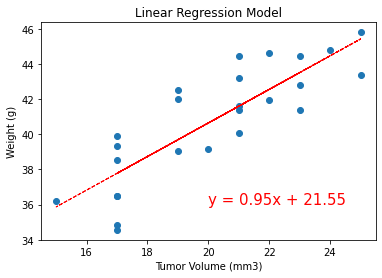

In [178]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(ave_weight,ave_tumor)

#Find the line of best fit 
m_slope, m_int, m_r, m_p, m_std_err = st.stats.linregress(ave_weight, ave_tumor)
m_fit = m_slope * ave_weight + m_int
line_eq = "y = " + str(round(m_slope,2)) + "x + " + str(round(m_int,2))

#PLOT
plt.scatter(ave_weight,ave_tumor)
plt.plot(ave_weight,m_fit,'r--', linewidth=1)
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.title('Linear Regression Model')
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"With line equation of {line_eq}")
